In [ ]:
!pip install sqlalchemy==1.3.23

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.23-cp310-cp310-linux_x86_64.whl size=1250459 sha256=fa0e2f61a2e8a83cd76a114126376881c865d6c2fc69c61e5571693762f178c7
  Stored in directory: /root/.cache/pip/wheels/6b/bd/5f/b63dc9976fc54a34ac2019fdbef4eb6a15aef4958298ce4b55
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.31
    Uninstalling SQLAlchemy-2.0.31:
      Successfully uninstalled SQLAlchemy-2.0.31
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.11.1 requires sqlalchemy<3.0dev,>=1.4, but you have sqlalchemy 1.3.23 which is incompatible.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.3.23 which is incompatible.


In [ ]:
!pip install ipython-sql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.23
    Uninstalling SQLAlchemy-1.3.23:
      Successfully uninstalled SQLAlchemy-1.3.23


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
db_file = '/content/drive/MyDrive/northwind database.db'

In [ ]:
conn = sqlite3.connect(db_file)

In [ ]:
cur = conn.cursor()

In [ ]:
cur.execute("""UPDATE Employees
               SET EmployeeNamess = LastName || ' ' || FirstName;
""")

In [ ]:
cur.execute("""ALTER TABLE 'Order Details'
              RENAME to OrderDetails
""")

In [ ]:
cur.execute("""SELECT c.CustomerID,e.EmployeeID,c.CompanyName,c.Country,c.Region,c.ContactName,c.City,
                o.OrderDate,o.ShipVia,o.Freight,o.ShipCountry,o.ShipRegion,
                od.UnitPrice,od.Quantity,od.Discount,pd.ProductName,pd.UnitsInStock,pd.UnitsOnOrder,pd.ReorderLevel
                ,pd.Discontinued,cg.CategoryName,r.RegionDescription,e.EmployeeNamess,e.Title,o.shippedDate
                FROM Customers as c
                JOIN Orders as o ON o.CustomerID = c.CustomerID
                JOIN OrderDetails as od ON od.OrderID = o.OrderID
                JOIN Products as pd ON od.ProductID = pd.ProductID
                JOIN Categories as cg ON pd.CategoryID = cg.CategoryID
                JOIN EmployeeTerritories as et ON o.EmployeeID = et.EmployeeID
                JOIN Territories as t ON t.TerritoryID = et.TerritoryID
                JOIN Regions as r  ON t.RegionID = r.RegionID
                JOIN Employees as e ON e.EmployeeID = o.EmployeeID
""")

In [ ]:
df = pd.DataFrame(cur.fetchall())

In [ ]:
df.columns = [X[0] for X in cur.description]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3310164 entries, 0 to 3310163
Data columns (total 25 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CustomerID         object 
 1   EmployeeID         int64  
 2   CompanyName        object 
 3   Country            object 
 4   Region             object 
 5   ContactName        object 
 6   City               object 
 7   OrderDate          object 
 8   ShipVia            int64  
 9   Freight            float64
 10  ShipCountry        object 
 11  ShipRegion         object 
 12  UnitPrice          float64
 13  Quantity           int64  
 14  Discount           float64
 15  ProductName        object 
 16  UnitsInStock       int64  
 17  UnitsOnOrder       int64  
 18  ReorderLevel       int64  
 19  Discontinued       object 
 20  CategoryName       object 
 21  RegionDescription  object 
 22  EmployeeNamess     object 
 23  Title              object 
 24  ShippedDate        object 
dtypes: float64(3), int

In [ ]:
df.duplicated().sum()

2700881

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609283 entries, 0 to 3310159
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         609283 non-null  object 
 1   EmployeeID         609283 non-null  int64  
 2   CompanyName        609283 non-null  object 
 3   Country            596000 non-null  object 
 4   Region             596000 non-null  object 
 5   ContactName        609283 non-null  object 
 6   City               596000 non-null  object 
 7   OrderDate          609283 non-null  object 
 8   ShipVia            609283 non-null  int64  
 9   Freight            609283 non-null  float64
 10  ShipCountry        609283 non-null  object 
 11  ShipRegion         609283 non-null  object 
 12  UnitPrice          609283 non-null  float64
 13  Quantity           609283 non-null  int64  
 14  Discount           609283 non-null  float64
 15  ProductName        609283 non-null  object 
 16  UnitsI

In [ ]:
df.Country.fillna(value= 'Country',inplace=True)
df.City.fillna(value= 'City',inplace=True)
df.Region.fillna(value= 'Region',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609283 entries, 0 to 3310159
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         609283 non-null  object 
 1   EmployeeID         609283 non-null  int64  
 2   CompanyName        609283 non-null  object 
 3   Country            609283 non-null  object 
 4   Region             609283 non-null  object 
 5   ContactName        609283 non-null  object 
 6   City               609283 non-null  object 
 7   OrderDate          609283 non-null  object 
 8   ShipVia            609283 non-null  int64  
 9   Freight            609283 non-null  float64
 10  ShipCountry        609283 non-null  object 
 11  ShipRegion         609283 non-null  object 
 12  UnitPrice          609283 non-null  float64
 13  Quantity           609283 non-null  int64  
 14  Discount           609283 non-null  float64
 15  ProductName        609283 non-null  object 
 16  UnitsI

In [ ]:
for col in df.columns:
    print(col, '\n', len(df[col].unique()))

CustomerID 
 93
EmployeeID 
 9
CompanyName 
 92
Country 
 22
Region 
 10
ContactName 
 93
City 
 70
OrderDate 
 15932
ShipVia 
 3
Freight 
 2140
ShipCountry 
 21
ShipRegion 
 9
UnitPrice 
 116
Quantity 
 68
Discount 
 11
ProductName 
 77
UnitsInStock 
 51
UnitsOnOrder 
 10
ReorderLevel 
 7
Discontinued 
 2
CategoryName 
 8
RegionDescription 
 4
EmployeeNamess 
 9
Title 
 4
ShippedDate 
 15840


In [ ]:
group_by_cols = df.groupby(['Region']).agg({'UnitPrice':'sum'}).reset_index()

In [ ]:
group_by_cols

,Region,UnitPrice
0,British Isles,1518104.74
1,Central America,970212.53
2,Eastern Europe,185221.47
3,North America,3022282.23
4,Northern Europe,750453.38
5,Region,384145.41
6,Scandinavia,545749.28
7,South America,3107121.75
8,Southern Europe,1865587.73
9,Western Europe,5229167.15


In [ ]:
group_by_cols.min()

Region       British Isles
UnitPrice        185221.47
dtype: object

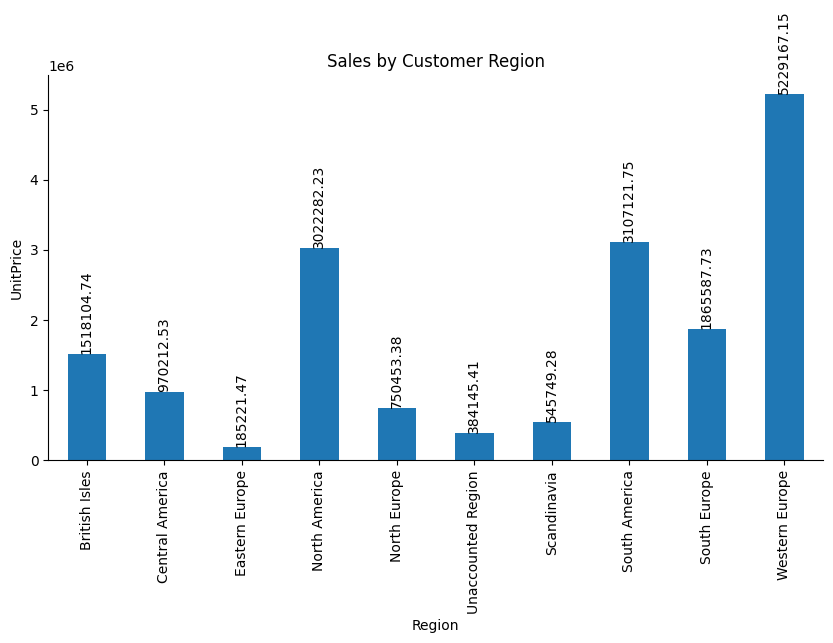

In [ ]:
# @title UnitPrice

from matplotlib import pyplot as plt
ax = group_by_cols['UnitPrice'].plot(kind='bar',title='Sales by Customer Region',figsize=(10,5))
plt.xlabel('Region')
plt.ylabel('UnitPrice')
for container in ax.containers:
    for bar in container:
        height = bar.get_height()  # Get the height of the bar
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # x position of the label
            height,                            # y position of the label
            f'{height}',                       # Text to display
            ha='center',                       # Horizontal alignment
            va='bottom',                       # Vertical alignment
            rotation='vertical'
            )
#plt.ylim((180000,5300000))
x_labels = {0:'British Isles',1:'Central America',2:'Eastern Europe',3:'North America',4:'North Europe',5:'Unaccounted Region',6:'Scandinavia',7:'South America', 8:'South Europe',9:'Western Europe'}
plt.xticks(ticks=list(x_labels.keys()), labels=list(x_labels.values()))
#plt.yticks('UnitPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('Sales by Customer region', dpi=300)

In [ ]:
group_by = df.groupby(['ShipRegion','ShipVia']).size().reset_index(name='Count')

In [ ]:
group_by

,ShipRegion,ShipVia,Count
0,British Isles,1,18187
1,British Isles,2,18983
2,British Isles,3,18103
3,Central America,1,10493
4,Central America,2,11684
5,Central America,3,12233
6,Eastern Europe,1,2783
7,Eastern Europe,2,2399
8,Eastern Europe,3,2946
9,North America,1,35637


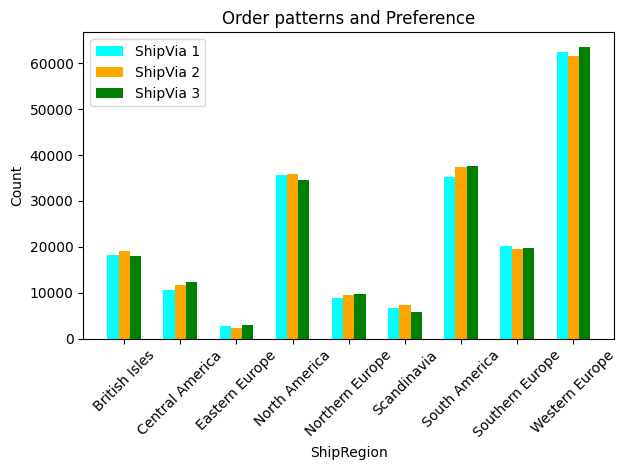

In [ ]:
# Pivot the DataFrame for easy plotting
pivot_df = group_by.pivot(index='ShipRegion', columns='ShipVia', values='Count').fillna(0)

# Extract data for plotting
regions = pivot_df.index
bar_width = 0.2
x = np.arange(len(regions))

# Data for each bar series
y1 = pivot_df[1].values
y2 = pivot_df[2].values
y3 = pivot_df[3].values

# Plotting
fig, ax = plt.subplots()

# Plot bars for each ShipVia
bar1 = ax.bar(x - bar_width, y1, bar_width, color='cyan', label='ShipVia 1')
bar2 = ax.bar(x, y2, bar_width, color='orange', label='ShipVia 2')
bar3 = ax.bar(x + bar_width, y3, bar_width, color='green', label='ShipVia 3')

# Add labels, title, and legend
ax.set_xlabel('ShipRegion')
ax.set_ylabel('Count')
ax.set_title('Order patterns and Preference')
ax.set_xticks(x)
ax.set_xticklabels(regions)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
#PRODUCT PERFORMANCE
Revenue = df['UnitPrice'] * df['Quantity'].index

In [ ]:
Group_by_Revenue = Revenue.groupby(df['ProductName']).sum().reset_index(name = 'Product_Revenue')

In [ ]:
Group_by_Revenue

,ProductName,Product_Revenue
0,Alice Mutton,5.116820e+11
1,Aniseed Syrup,1.313809e+11
2,Boston Crab Meat,2.394176e+11
3,Camembert Pierrot,4.428167e+11
4,Carnarvon Tigers,8.099088e+11
...,...,...
72,Uncle Bob's Organic Dried Pears,3.944620e+11
73,Valkoinen suklaa,2.124447e+11
74,Vegie-spread,5.721816e+11
75,Wimmers gute Semmelknödel,4.350618e+11


In [ ]:
Group_by_Revenue.min()

ProductName         Alice Mutton
Product_Revenue    32771275664.5
dtype: object

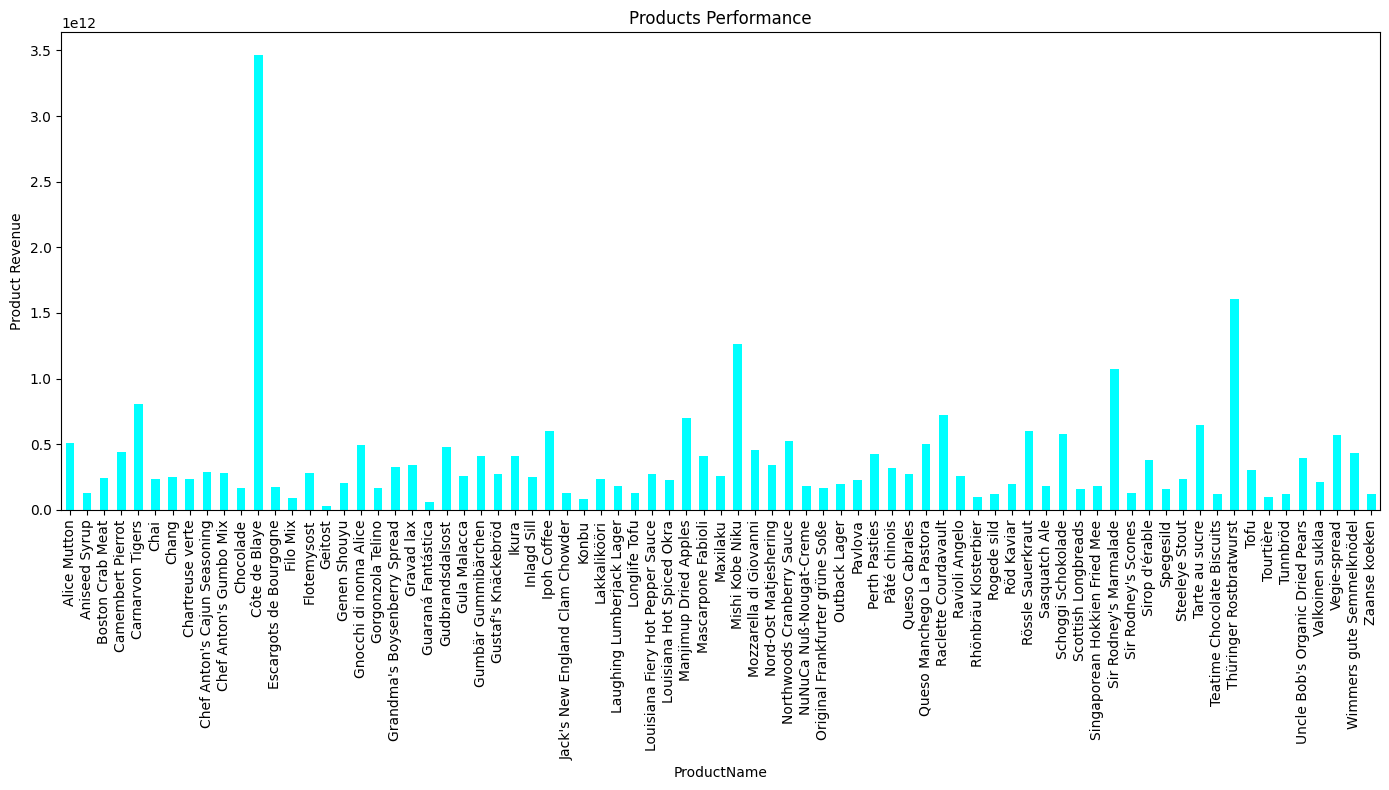

In [ ]:
from matplotlib import pyplot as plt
# Pivot the DataFrame for easy plotting
pivot_df = Group_by_Revenue.pivot(index='ProductName', columns='Product_Revenue').fillna(0)
Product_Name = pivot_df.index


ax = Group_by_Revenue['Product_Revenue'].plot(kind='bar' , title='Products Performance', figsize=(14,8),color = 'cyan')
plt.xlabel('ProductName')
plt.ylabel('Product Revenue')
#plt.xlim((0,80))

ax.set_xticklabels(Product_Name)
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S')
    except ValueError:
        return pd.to_datetime(date_str, format='%Y-%m-%d')

df['OrderDate'] = df['OrderDate'].apply(parse_date)

df['date'] = pd.to_datetime(df['OrderDate']).dt.date
df['date']

0          2016-07-04
7          2016-07-04
14         2016-07-04
21         2016-07-05
26         2016-07-05
              ...    
3310139    2023-01-10
3310144    2023-01-10
3310149    2023-01-10
3310154    2023-01-10
3310159    2023-01-10
Name: date, Length: 609283, dtype: object

In [ ]:
#SALES TREND
group_by_date = df.groupby(['date']).agg({'UnitPrice':'sum'}).reset_index()
group_by_date = group_by_date.set_index('date')
group_by_date

,UnitPrice
date,
2012-07-10,2287.03
2012-07-11,4639.72
2012-07-12,7175.36
2012-07-13,3590.36
2012-07-14,2988.11
...,...
2023-10-24,815.33
2023-10-25,3327.55
2023-10-26,2033.21


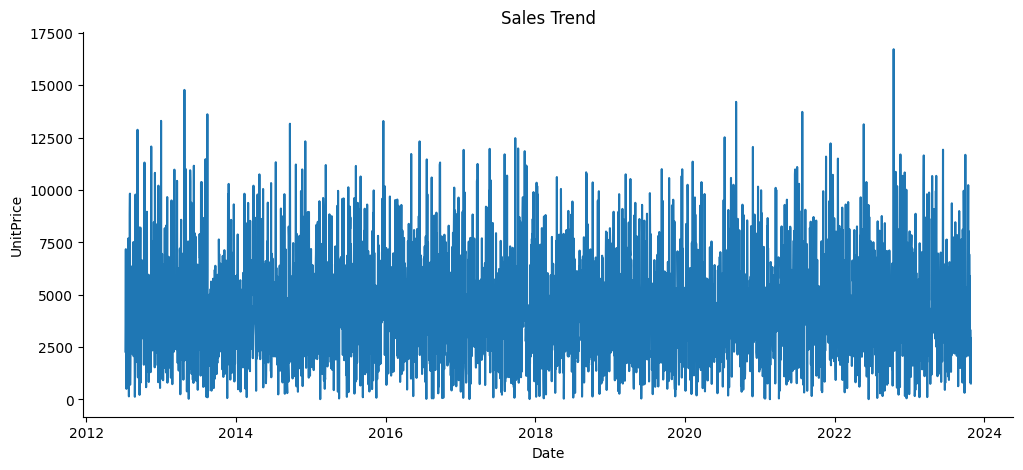

In [ ]:
from os import terminal_size
# @title UnitPrice

#from matplotlib import pyplot as plt
group_by_date['UnitPrice'].plot(kind='line', figsize=(12, 5), title='Sales Trend')
plt.xlabel('Date')
plt.ylabel('UnitPrice')
plt.gca().spines[['top', 'right']].set_visible(False)


In [ ]:
#Checking if our sales trend is a stationary or non-stationary data
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
  #Pass in a time series and an optional title , return an ADF report
  print(f'Augmented Dickey-Fuller Test: {title}')
  result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

  labels = ['ADF test statistic','p-value','# lags used','# observations']
  out = pd.Series(result[0:4],index=labels)

  for key,val in result[4].items():
    out[f'critical value ({key})']=val

  print(out.to_string())      #.to_string() removes the line "dtype : float64"

  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis")
    print("Reject the null hypothesis")
    print("Data has no unit root and is stationary")
  else:
    print("Weak evidence against the null hypothesis")
    print("Fail to reject the null hypothesis")
    print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(group_by_date['UnitPrice'])
#Data is Stationary i.e does not exhibit trend or seasonality.

Augmented Dickey-Fuller Test: 
ADF test statistic       -63.747229
p-value                    0.000000
# lags used                0.000000
# observations          4052.000000
critical value (1%)       -3.431965
critical value (5%)       -2.862254
critical value (10%)      -2.567150
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
#Profitability
#Based on the above information, discount 1%, 2%, 3%, 4% and 6% have very small number of entries. Most of them only have 1 entry.
#This is not a good sample size for our hypothesis testing and they could even be errors in the database.
#Therefore, I will change these discount percentages as 5%.
# changing the 1%, 2%, 3%, 4% and 6% discounts as 5%

x = [0.01, 0.02, 0.03, 0.04, 0.06]

for i in x:
    df.loc[df['Discount']== i, 'Discount'] = 0.05

In [ ]:
discounts = df['Discount'].unique()
discounts.sort()
discounts

#for i in range(len(discounts)):

   # discount = discounts[i]
  #  s1 = df[df['Discount']== discount]['Quantity']
  #  print("{}:  ".format(discount), len(s1))

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25])

In [ ]:
df['profit'] = (df['UnitPrice'] * (1 - df['Discount'])) * df['Quantity']

In [ ]:
profit_table= df.groupby(['ProductName']).agg({'profit':'sum'}).reset_index()
# Convert the profit column to normal numbers and approximate
df['profit'] = df['profit'].map('{:,.2f}'.format)
profit_table

,ProductName,profit
0,Alice Mutton,7.884412e+06
1,Aniseed Syrup,2.021624e+06
2,Boston Crab Meat,3.681884e+06
3,Camembert Pierrot,6.900444e+06
4,Carnarvon Tigers,1.260467e+07
...,...,...
72,Uncle Bob's Organic Dried Pears,6.118254e+06
73,Valkoinen suklaa,3.259726e+06
74,Vegie-spread,8.810705e+06
75,Wimmers gute Semmelknödel,6.688748e+06


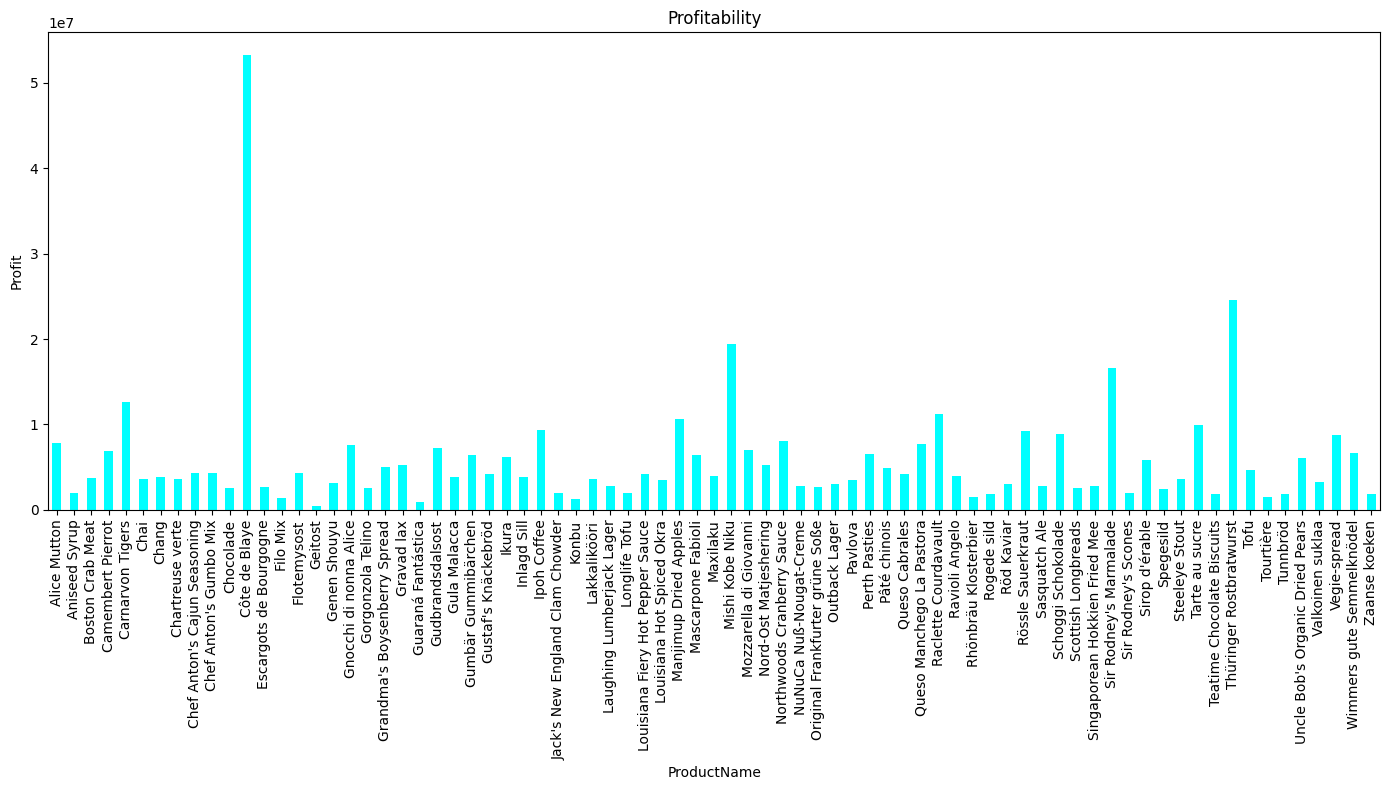

In [ ]:
# Pivot the DataFrame for easy plotting
pivot_df = profit_table.pivot(index='ProductName', columns= 'profit').fillna(0)
Product_Name = pivot_df.index


ax = profit_table['profit'].plot(kind='bar' , title='Profitability', figsize=(14,8),color = 'cyan')
plt.xlabel('ProductName')
plt.ylabel('Profit')
#plt.xlim((0,80))

ax.set_xticklabels(Product_Name)
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
#Checking For seasonal Effect
group_by_date = df.groupby(['date']).agg({'UnitPrice':'sum'}).reset_index()
group_by_date['date'] = pd.to_datetime(group_by_date['date'])
group_by_date = group_by_date.set_index('date')
group_by_date = group_by_date.resample('M').sum()
group_by_date

,UnitPrice
date,
2012-07-31,80493.91
2012-08-31,136891.78
2012-09-30,135081.92
2012-10-31,126042.88
2012-11-30,113653.89
...,...
2023-06-30,116536.81
2023-07-31,131379.27
2023-08-31,128903.64


Text(0, 0.5, 'Sales')

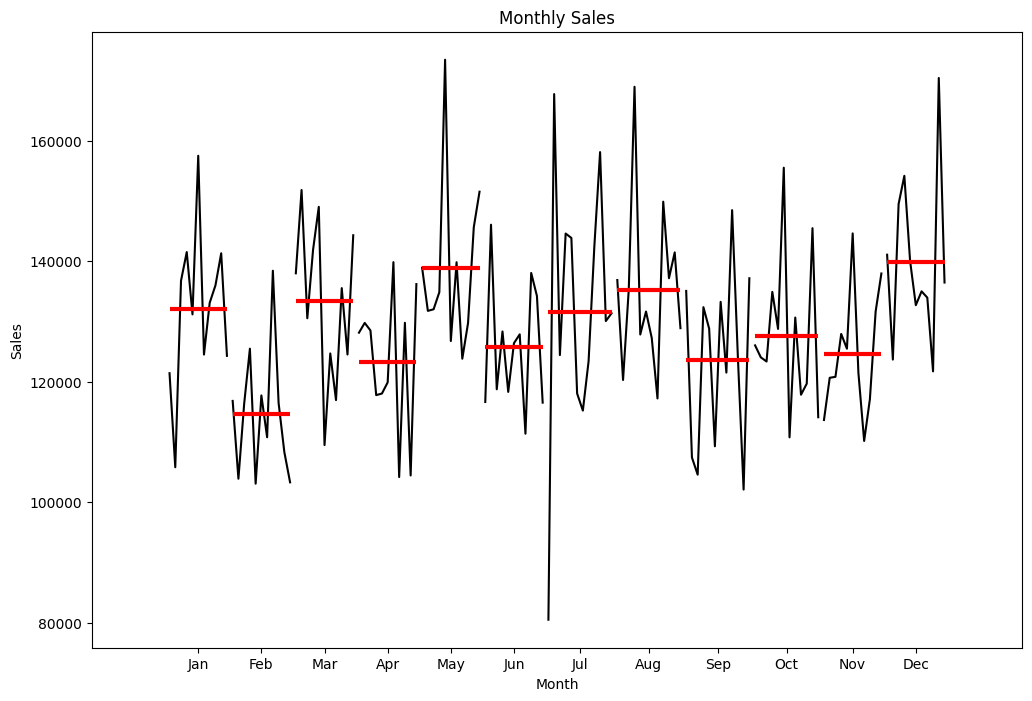

In [ ]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot


fig, ax = plt.subplots(figsize=(12, 8))
month_plot(group_by_date['UnitPrice'], ax=ax);
plt.title('Seasonal Effect')
plt.xlabel('Month')
plt.ylabel('Sales')

In [ ]:
#PERFORMED THE ORDER TREND OVER TIME ,INCLUDING THE IMPACT OF PROMOTIONS AND EXTERNAL EVENT ON POWERBI
#AS I COULDN'T FIT THE TABLE WELL HERE TO PERFORM THAT PURPOSE.